# Part I: Exploratory Data Analysis

## Introduction

The purpose of the EDA is to identify any potential trends that may be further explored. The EDA is comprised of examining dataset without intervals and examining dataset with 15 minute intervals. Studying data without intervals can offer a basic overview of the entire dataset to examine which months are of most interest. However, studying data with intervals makes it easier to examine smaller facets and parameters such as days and hours.

## Examine Dataset without Intervals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from statsmodels.stats import weightstats as stests
import json

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df = pd.read_json('logins.json')
df['Month'] = pd.DatetimeIndex(df['login_time']).month
df['Day'] = pd.DatetimeIndex(df['login_time']).day
df['Hour'] = pd.DatetimeIndex(df['login_time']).hour
df['Minute'] = pd.DatetimeIndex(df['login_time']).minute
df['Quarter']=(df.Minute/15).apply(int)
df['Day of Week'] = pd.DatetimeIndex(df['login_time']).dayofweek
df.set_index('login_time', inplace=True)
df.head()

,Month,Day,Hour,Minute,Quarter,Day of Week
login_time,,,,,,
1970-01-01 20:13:18,1,1,20,13,0,3
1970-01-01 20:16:10,1,1,20,16,1,3
1970-01-01 20:16:37,1,1,20,16,1,3
1970-01-01 20:16:36,1,1,20,16,1,3
1970-01-01 20:26:21,1,1,20,26,1,3


In [4]:
df.describe()

,Month,Day,Hour,Minute,Quarter,Day of Week
count,93142.000000,93142.000000,93142.000000,93142.000000,93142.000000,93142.000000
mean,2.424062,14.667830,11.635363,29.801711,1.519551,3.570301
std,0.995154,8.596967,7.816792,17.245034,1.114348,1.946072
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,7.000000,4.000000,15.000000,1.000000,2.000000
50%,3.000000,14.000000,12.000000,30.000000,2.000000,4.000000
75%,3.000000,22.000000,19.000000,45.000000,3.000000,5.000000
max,4.000000,31.000000,23.000000,59.000000,3.000000,6.000000


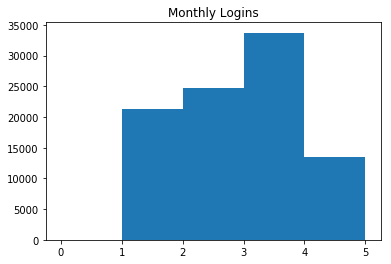

In [5]:
# Monthly Logins
plt.hist(df.Month,bins=range(6))
plt.title('Monthly Logins')
plt.show()

In [6]:
# Find Average Daily Logins per Month
months=sorted(df.Month.unique())
dim=[]
for m in months:
    dim.append(len(set(df.Day[df.Month==m])))
for m in months:
    tmp=df.loc[df.Month==m,:]
    print('Average daily logins for month {} was {:4.0f}.'.format(m,float(tmp.Day.count())/dim[m-1]))

Average daily logins for month 1 was  685.
Average daily logins for month 2 was  881.
Average daily logins for month 3 was 1088.
Average daily logins for month 4 was 1039.


## Examine Dataset with Intervals

In [7]:
# Aggregate by 15 min Intervals
agg_df = pd.read_json('logins.json')
agg_df.set_index('login_time', inplace=True)
agg_df['count'] = 1
agg_df = agg_df.resample('15T').sum()
agg_df.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [8]:
# Create Monthly DataFrames
Jan_data = agg_df['1970-01-01': '1970-01-31']
Feb_data = agg_df['1970-02-01': '1970-02-28']
Mar_data = agg_df['1970-03-01': '1970-03-31']
Apr_data = agg_df['1970-04-01': '1970-04-13']

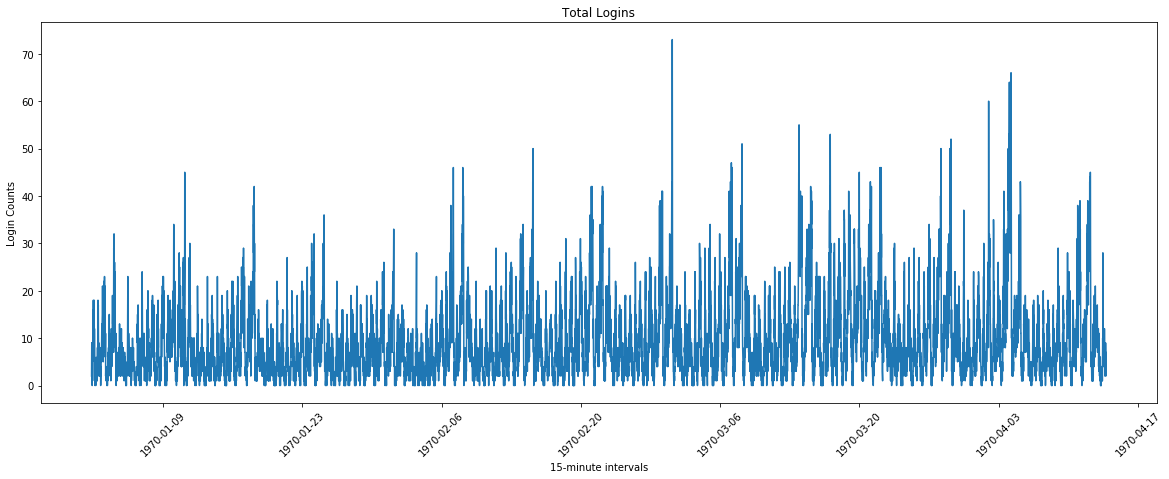

In [9]:
# Total Aggregrate
plt.figure(figsize=(20,7))
plt.plot(agg_df)
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Login Counts')
plt.title('Total Logins');

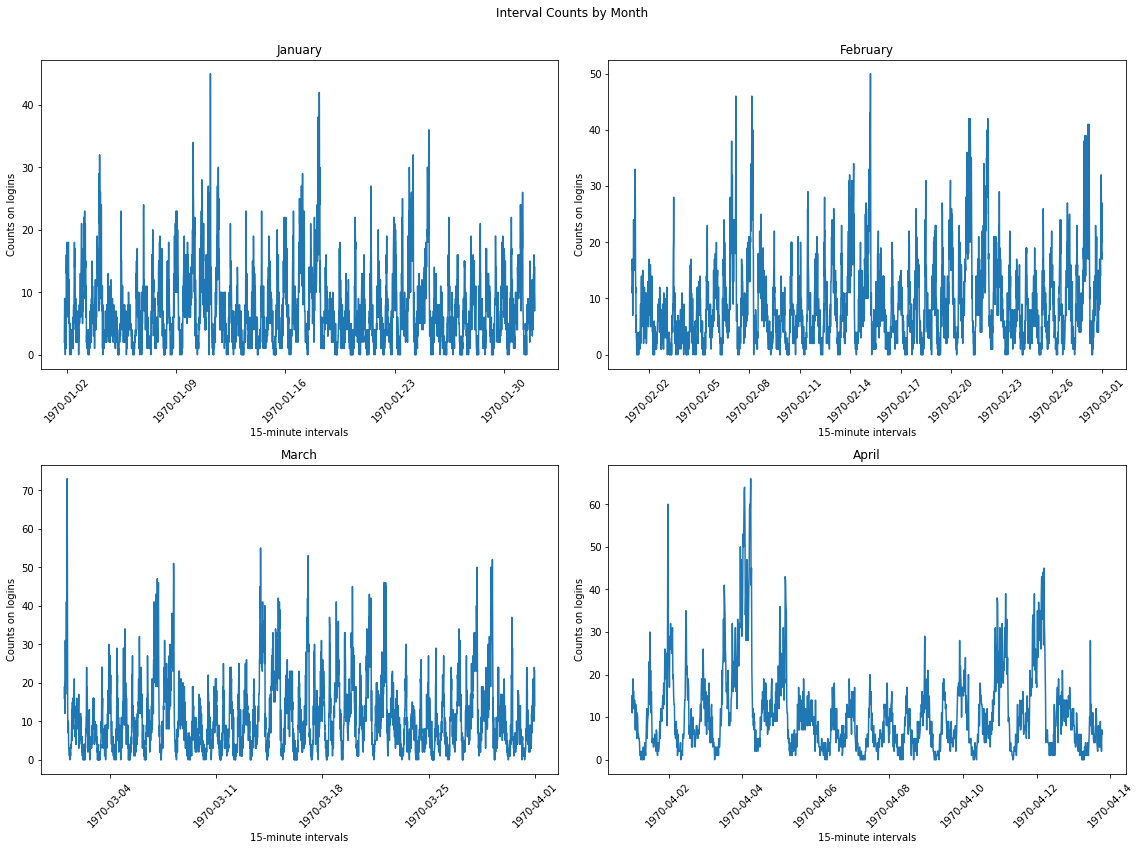

In [10]:
# Plotting all Months
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(16, 12)
plt.suptitle('Interval Counts by Month')

plt.subplot(2, 2, 1)
plt.plot(Jan_data)
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')
plt.title('January')

plt.subplot(2, 2, 2)
plt.plot(Feb_data)
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')
plt.title('February')

plt.subplot(2, 2, 3)
plt.plot(Mar_data)
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')
plt.title('March')

plt.subplot(2, 2, 4)
plt.plot(Apr_data)
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')
plt.title('April')

plt.tight_layout(rect=[0, 0, 1, 0.95])

In [11]:
# Create New Datetime Columns
agg_df['Month'] = agg_df.index.month
agg_df['Day of Month'] = agg_df.index.day
agg_df['Day of Week'] = agg_df.index.dayofweek
agg_df['Hour of Day'] = agg_df.index.hour

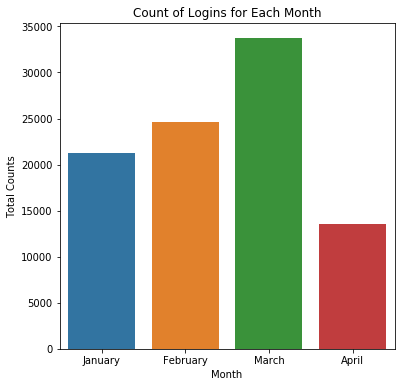

In [12]:
# Graph Month
plt.figure(figsize=(6,6))
month_count = agg_df.groupby('Month').sum()
month_count.index = ['January', 'February', 'March','April']
sns.barplot(x='index', y='count', data=month_count.reset_index())
plt.ylabel('Total Counts')
plt.xlabel('Month')
plt.title('Count of Logins for Each Month');

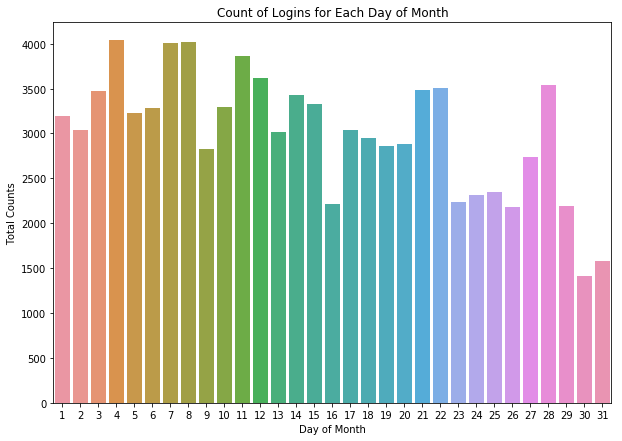

In [13]:
# Graph Day of Month
plt.figure(figsize=(10,7))
x_count = agg_df.groupby('Day of Month').sum()
sns.barplot(x='Day of Month', y='count', data=x_count.reset_index())
plt.ylabel('Total Counts')
plt.xlabel('Day of Month')
plt.title('Count of Logins for Each Day of Month');



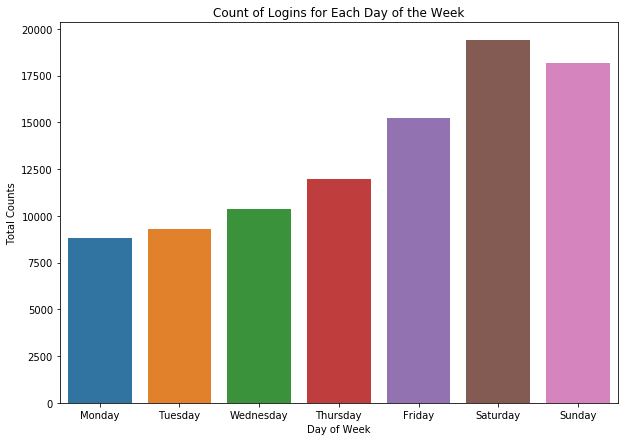

In [14]:
# Graph Day of Week
plt.figure(figsize=(10,7))
day_count = agg_df.groupby('Day of Week').sum()
day_count.index = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
sns.barplot(x='index', y='count', data=day_count.reset_index())
plt.ylabel('Total Counts')
plt.xlabel('Day of Week')
plt.title('Count of Logins for Each Day of the Week');

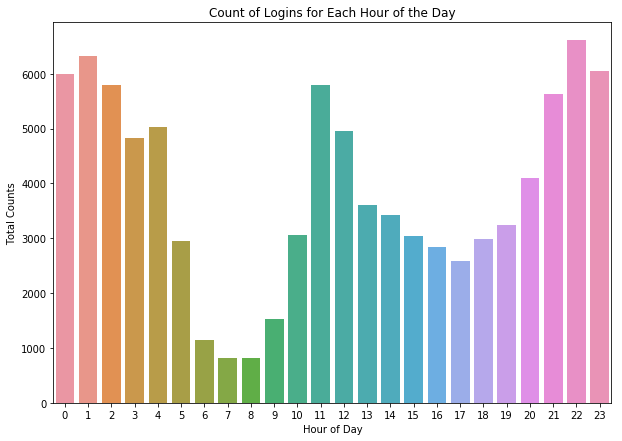

In [15]:
# Graph Hour of Day
plt.figure(figsize=(10,7))
hourly_count = agg_df.groupby('Hour of Day').sum()
sns.barplot(x='Hour of Day', y='count', data=hourly_count.reset_index())
plt.ylabel('Total Counts')
plt.xlabel('Hour of Day')
plt.title('Count of Logins for Each Hour of the Day');

## Summary

Analysis of non-aggregated and aggregated versions of the data can offer insights into different login patterns. The non-aggregated data analysis shows that March has the most accumulative logins per month while March and April have the most daily logins. The aggregated data seems to support the monthly login patterns as seen in the non-aggregated data. Furthermore, the aggregated data analysis reveal general patterns in the login occurrences. The first two weeks of a month have the most logins. Friday, Saturday and Sunday have most logins among days of the week. Everyday, logins peak during hours 0-4, 11-12, and 21-23. These results seem to suggest that logins occur the most on weekends and during either nighttime or noontime.

# Part II: Experiment and Metrics Design

1. I would choose the number of bridge crossings as the main metric of success. The
intention of this experiment is to determine whether reimbursements will encourage more drivers to commute between the cities through the bridge. If the experiment is successful, then it should lead to an increase in the number of crossings.

2. My experiment will examine whether reimbursements encourage more crossings between the two cities. This experiment would focus on 50 randomly selected drivers who would record their number of crossings before and after the policy. The data will be analyzed using one-sample z-test to determine whether any change in the number of crossings is significant; this type of statistical test was chosen since the sample size is greater than 30 and consists of a single sample group. If the reimbursement leads to a significant increase in crossings, then the policy should be continued since this would lead to increased commerce and interaction between cities. Otherwise, the reimbursement should be discontinued because it would lead to a loss of revenue.


# Part III: Predictive Modeling

## Introduction

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

## Cleaning, EDA, and Visualization

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from statsmodels.stats import weightstats as stests
import json

import warnings
warnings.filterwarnings("ignore")

In [17]:
df = pd.DataFrame(json.load(open('ultimate_data_challenge.json')))
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [19]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
      dtype='object')

In [20]:
# Convert to Datetime
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [21]:
# Create Endtime Objects
end_date = max(df['last_trip_date'])
days = pd.date_range(end=end_date, periods=30, freq = 'D')
df['status'] = df['last_trip_date'].map(lambda x: "active" if x in days else "inactive")

In [22]:
df.groupby(by=['status'])['status'].count()

status
active      18310
inactive    31690
Name: status, dtype: int64

### Comparing City, Phone, and Black User 

In [23]:
# Compare Activeness by City
df.groupby(by=['city','status'])['status'].count()

city            status  
Astapor         active       4022
                inactive    12512
King's Landing  active       6307
                inactive     3823
Winterfell      active       7981
                inactive    15355
Name: status, dtype: int64

In [24]:
# Compare Activeness by Phone
df.groupby(by=['phone','status'])['status'].count()

phone    status  
Android  active       2942
         inactive    12080
iPhone   active      15238
         inactive    19344
Name: status, dtype: int64

In [25]:
# Compare Activeness by Black Users 
df.groupby(by=['ultimate_black_user','status'])['status'].count()

ultimate_black_user  status  
False                active       8951
                     inactive    22195
True                 active       9359
                     inactive     9495
Name: status, dtype: int64

In [26]:
# Create Active-Only DataFrame Object
active_only = df[df['status'] == 'active']

In [27]:
# Percentage Active in Each City
percentage_city = (active_only['city'].value_counts()/df['city'].value_counts())*100
percentage_city

Astapor           24.325632
King's Landing    62.260612
Winterfell        34.200377
Name: city, dtype: float64

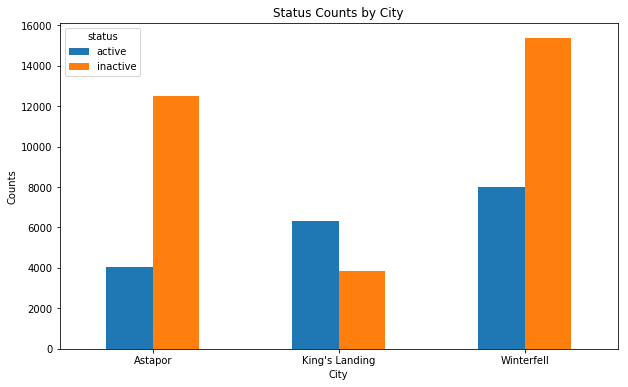

In [28]:
# Graphing the Number of Active Drivers by City
df.groupby(by=['city','status'])['status'].count().unstack().plot.bar(rot=0,figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Counts')
plt.title('Status Counts by City');

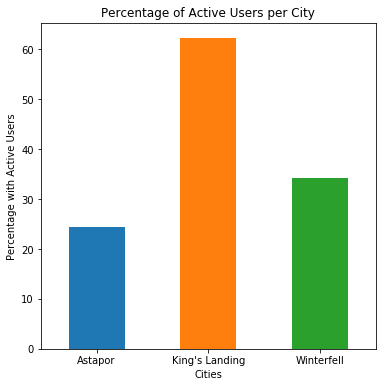

In [29]:
# Graphing the Percentage of Active Drivers by City
ax = percentage_city.plot.bar(x='city', stacked=True, rot=0,figsize=(6, 6))
ax.set_xlabel('Cities')
ax.set_ylabel('Percentage with Active Users')
ax.set_title('Percentage of Active Users per City');

In [30]:
# Percentage Active by Phone
percentage_phone = (active_only['phone'].value_counts()/df['phone'].value_counts())*100
percentage_phone

iPhone     44.063386
Android    19.584609
Name: phone, dtype: float64

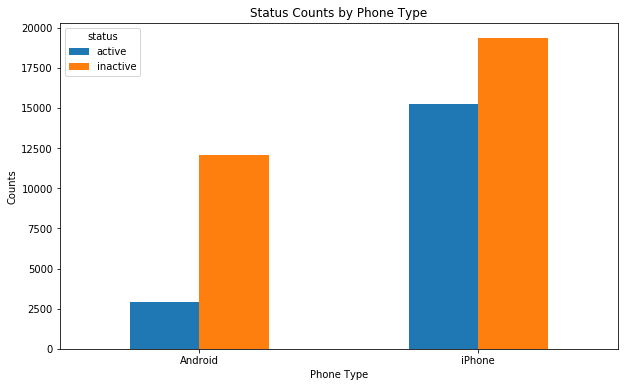

In [31]:
# Graphing the Number of Active Drivers by Phone Type
df.groupby(by=['phone','status'])['status'].count().unstack().plot.bar(rot=0,figsize=(10, 6))
plt.xlabel('Phone Type')
plt.ylabel('Counts')
plt.title('Status Counts by Phone Type');

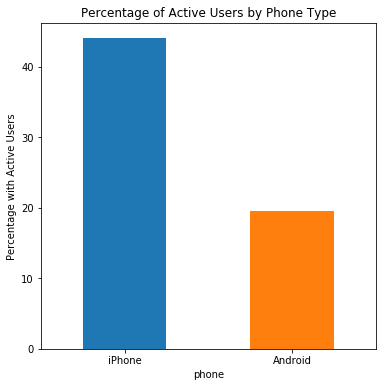

In [32]:
# Graphing the Percentage of Active Drivers by Phone Type
ax = percentage_phone.plot.bar(x='phone', stacked=True, rot=0,figsize=(6, 6))
ax.set_xlabel('phone')
ax.set_ylabel('Percentage with Active Users')
ax.set_title('Percentage of Active Users by Phone Type');

In [33]:
# Percentage Active by Ultimate Black User
percentage_ubu = (active_only['ultimate_black_user'].value_counts()/df['ultimate_black_user'].value_counts())*100
percentage_ubu

False    28.738843
True     49.639334
Name: ultimate_black_user, dtype: float64

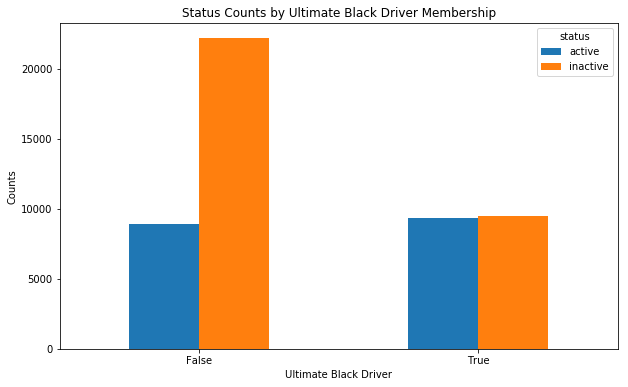

In [34]:
# Graphing the Number of Active Drivers by Ultimate Black User
df.groupby(by=['ultimate_black_user','status'])['status'].count().unstack().plot.bar(rot=0,figsize=(10, 6))
plt.xlabel('Ultimate Black Driver')
plt.ylabel('Counts')
plt.title('Status Counts by Ultimate Black Driver Membership');

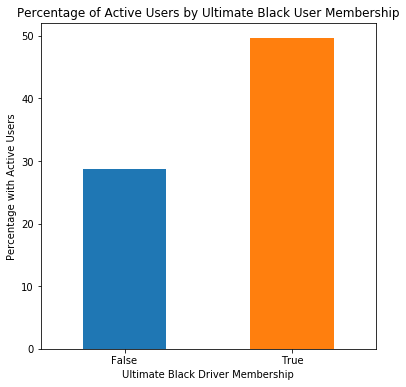

In [35]:
# Graphing the Percentage of Active Drivers by Ultimate Black User
ax = percentage_ubu.plot.bar(x='ultimate_black_user', stacked=True, rot=0,figsize=(6, 6))
ax.set_xlabel('Ultimate Black Driver Membership')
ax.set_ylabel('Percentage with Active Users')
ax.set_title('Percentage of Active Users by Ultimate Black User Membership');

There are some interesting assumptions that can be extrapolated from the data. In general, approximately 57% of users are active by the end of the month. 44.06% of iPhone users are active compared to 19.58% of Android users. 49.64% of Ultimate Black members are active compared to 28.74% of non-Ultimate Black members. 62.26% of King’s Landing users, 34.20% of Winterfell users, and 24.33% of Astapor users are active. Based on these results, users who use iPhones, are members of the Ultimate Black program, come from King's Landing are most likely to be active.

### Comparing Rating by Driver, Rating of Driver, Surge, Distance, and Percentage

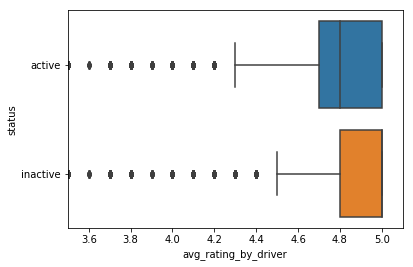

In [36]:
sns.boxplot(x='avg_rating_by_driver', y='status', data=df)
plt.xlim(3.5, 5.1);

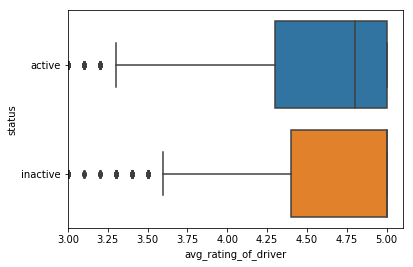

In [37]:
sns.boxplot(x='avg_rating_of_driver', y='status', data=df)
plt.xlim(3.0, 5.1);

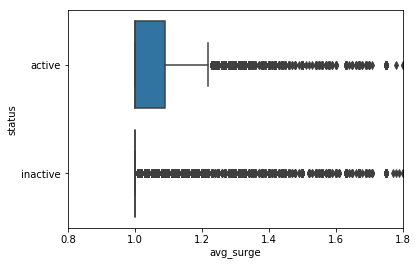

In [38]:
sns.boxplot(x='avg_surge', y='status', data=df)
plt.xlim(0.8, 1.8);

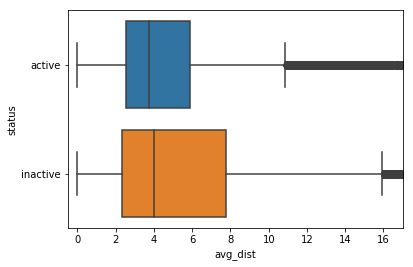

In [39]:
sns.boxplot(x='avg_dist', y='status', data=df)
plt.xlim(-0.5, 17);

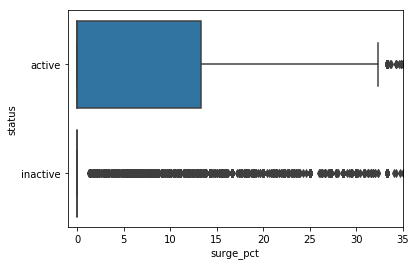

In [40]:
sns.boxplot(x='surge_pct', y='status', data=df)
plt.xlim(-1, 35);

## Machine Learning

In [41]:
# Import Modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz


In [42]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct',
       'status'],
      dtype='object')

In [43]:
# Drop datetime features
df.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)

In [44]:
# Prepare Data
df.status = (df.status == 'active').astype(int)
avg_of_driver=df.avg_rating_of_driver.mean()
avg_by_driver=df.avg_rating_by_driver.mean()
df['avg_rating_of_driver'].fillna(avg_of_driver,inplace=True)
df['avg_rating_by_driver'].fillna(avg_by_driver,inplace=True)
df['phone'].fillna('iPhone',inplace=True)

In [45]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,status
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,False,82.4,0


In [46]:
ndf=pd.get_dummies(df,columns=['phone','city'], drop_first=True)
ndf['ultimate_black_user']=ndf['ultimate_black_user'].astype(int)

In [47]:
# Splitting Data
X = np.array(ndf.drop('status', axis=1))
y = np.array(ndf.status)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Logistic Regression

In [48]:
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)
print(classification_report(y_true=y_test, y_pred=log_reg.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.80      0.72      0.76      9523
        yes       0.58      0.68      0.63      5477

avg / total       0.72      0.71      0.71     15000



### k-NN Classification

In [49]:
knn = KNeighborsClassifier(leaf_size=10)
knn.fit(X_train, y_train)
print(classification_report(y_true=y_test, y_pred=knn.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.79      0.82      0.80      9523
        yes       0.66      0.62      0.64      5477

avg / total       0.74      0.74      0.74     15000



### Random Forest Classifier

In [50]:
# Perform Random Forest Regression
rfc = RandomForestClassifier(n_estimators=100, max_features=8, oob_score=True)
    
    
#rfc = RandomForestClassifier(min_samples_leaf=1, n_estimators=400, max_features='log2',criterion='gini', min_samples_split=4, max_depth=6)
rfc.fit(X_train, y_train)
print(classification_report(y_true=y_test, y_pred=rfc.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.80      0.82      0.81      9523
        yes       0.68      0.65      0.67      5477

avg / total       0.76      0.76      0.76     15000



### Gradient Boosting Classifier

In [51]:
gb = GradientBoostingClassifier(learning_rate=0.2, n_estimators=200)
gb.fit(X_train, y_train)
print(classification_report(y_true=y_test, y_pred=gb.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.82      0.86      0.84      9523
        yes       0.74      0.67      0.70      5477

avg / total       0.79      0.79      0.79     15000



In [52]:
# Show importances of features
importances = pd.DataFrame(list(zip(ndf.columns, gb.feature_importances_)), columns = ['Features', 'Importance'])
importances.sort_values(by='Importance', ascending=False)

,Features,Importance
0,avg_dist,0.211576
7,weekday_pct,0.162450
5,trips_in_first_30_days,0.162274
4,surge_pct,0.101260
1,avg_rating_by_driver,0.093563
2,avg_rating_of_driver,0.073536
3,avg_surge,0.073188
9,phone_iPhone,0.039816
10,city_King's Landing,0.032764
8,status,0.024803


### Summary

The outcome of the data is the status of users as active or non-active, which is represented as binary dummy variables. As such, the results can be interpreted using either regression and classification models. I experimented with logistic regression, k-nearest neighbors, random forest, and gradient boosting. Ultimately, I settled on gradient boosting as it provided the most reliable scores compared to the other models. Furthermore, gradient boosting's stage-based structure allows it to correct errors and biases.

There are many patterns and inferences that can be drawn from the visualization and machine learning model. Visualization showed that Winterfell users are the most active; iPhone owners have more active users than Android owners; and Ultimate Black Members have more active users than non-members. However, the numerical features of average distance, number of trips in the first 30 days, and the percentage of the user’s trips occurring during a weekday have the greatest impact on general active status according to the modeling. As such, numerical features have greatest impact on whether users are active or not though categorical features are still of consideration.

There are some recommendations that can be drawn from this research. The influence of numerical features like distance, number of trips, and weekday commutes suggest that active users are most likely using the service to travel long distances for work. As such, the service could market itself towards long-distance commuters. Furthermore, iPhone owners and Winterfell residents are active users among their categories so there could be more market research on these members of these categorical features. Using this research, Ultimate can refine its business model to focus gaining and maintaining a specific customer demographic who would become active users.